In [35]:
from aocd.models import Puzzle
import seaborn as sns
import matplotlib.pyplot as plt

puzzle = Puzzle(year=2023, day=10)

--- Day 10: Pipe Maze ---

You use the hang glider to ride the hot air from Desert Island all the way up to the floating metal island. This island is surprisingly cold and there definitely aren't any thermals to glide on, so you leave your hang glider behind.

You wander around for a while, but you don't find any people or animals. However, you do occasionally find signposts labeled "Hot Springs" pointing in a seemingly consistent direction; maybe you can find someone at the hot springs and ask them where the desert-machine parts are made.

The landscape here is alien; even the flowers and trees are made of metal. As you stop to admire some metal grass, you notice something metallic scurry away in your peripheral vision and jump into a big pipe! It didn't look like any animal you've ever seen; if you want a better look, you'll need to get ahead of it.

Scanning the area, you discover that the entire field you're standing on is densely packed with pipes; it was hard to tell at first because they're the same metallic silver color as the "ground". You make a quick sketch of all of the surface pipes you can see (your puzzle input).

The pipes are arranged in a two-dimensional grid of tiles:

    | is a vertical pipe connecting north and south.
    - is a horizontal pipe connecting east and west.
    L is a 90-degree bend connecting north and east.
    J is a 90-degree bend connecting north and west.
    7 is a 90-degree bend connecting south and west.
    F is a 90-degree bend connecting south and east.
    . is ground; there is no pipe in this tile.
    S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.

Based on the acoustics of the animal's scurrying, you're confident the pipe that contains the animal is one large, continuous loop.

For example, here is a square loop of pipe:

.....
.F-7.
.|.|.
.L-J.
.....

If the animal had entered this loop in the northwest corner, the sketch would instead look like this:

.....
.S-7.
.|.|.
.L-J.
.....

In the above diagram, the S tile is still a 90-degree F bend: you can tell because of how the adjacent pipes connect to it.

Unfortunately, there are also many pipes that aren't connected to the loop!

Find the single giant loop starting at S. How many steps along the loop does it take to get from the starting position to the point farthest from the starting position?

In [34]:
grid = [list(line) for line in puzzle.input_data.split("\n")]
for i, line in enumerate(puzzle.input_data.split("\n")):
    print(line)
    if i > 10:
        break

opposite = {
    "north": "south",
    "east": "west",
    "south": "north",
    "west": "east",
}

pipe_directions = {
    "|": ["north", "south"],
    "-": ["east", "west"],
    "L": ["north", "east"],
    "J": ["north", "west"],
    "7": ["south", "west"],
    "F": ["south", "east"],
    ".": [],
    "S": ["north", "east", "south", "west"],
}


class PipeMaze():
    def __init__(self, grid) -> None:
        self.grid = grid
        self.came_from = None
        self.path = []
    
    def set_start(self):
        for r in range(len(self.grid)):
            for c in range(len(self.grid[0])):
                if self.grid[r][c] == "S":
                    self.start_pos = (r, c)
                    self.cur_pos = (r, c)
                    return True
        raise RuntimeError("Start not found")
    
    def get_pos(self, direction):
        r, c = self.cur_pos 
        if direction == "north":
            r -= 1
        elif direction == "east":
            c += 1
        elif direction == "south":
            r += 1
        elif direction == "west":
            c -= 1
        return r, c
    
    def get_pipe(self, pos):
        r, c = pos
        return self.grid[r][c]
    
    def get_pipe_directions(self, pos):
        return pipe_directions[self.get_pipe(pos)]
    
    def check_direction(self, direction):
        check_pos = self.get_pos(direction)
        coming_from = opposite[direction]
        return coming_from in self.get_pipe_directions(check_pos)

    def move_direction(self, direction):
        new_pos = self.get_pos(direction)
        self.cur_pos = new_pos
        self.path.append(new_pos)
        self.came_from = opposite[direction]

    def get_next_direction(self):
        next_options = self.get_pipe_directions(self.cur_pos)
        for direction in next_options:
            if direction != self.came_from:
                return direction
    
    def solve_maze_a(self):
        self.set_start()
        for direction in ["north", "east", "south", "west"]:
            if self.check_direction(direction):
                next_direction = direction
                break
        
        solved = False
        while solved == False:

            self.move_direction(next_direction)
            next_direction = self.get_next_direction()
            if self.get_pipe(self.get_pos(next_direction)) == "S":
                print("Found the start point again!")
                solved = True

        answer = int(len(self.path) / 2) + 1
        return answer



maze = PipeMaze(grid)
answer_a = maze.solve_maze_a()

puzzle.answer_a = answer_a




F.777F-L7-LL7.F77FF7F77--7|7L-F7-7.FF---7F77.FFJ--FL77.|77L.|F7.F7FF7--7FFL-J--F|--F7FF77FL---F7.FF7..FF7JJ-LF7JJF-L7LJ.|.L-F.F.|.F-.FL-7L.F
LF7L-77L7FL|7FL|7L777.77|FJJ..L|.|-FL-7FJ||7--LJL-7.|--777.FF7L-.77.F-|-|7...|.F||7|F-JF-F--.F.LFFJL7F7||J.F|||LL|JFL7|F77.L|.|.L-|F|--L7.FJ
|L|F|7-L|7L||-|L7FJJJFL7-77|F7-L7JF7F7||FJL777|77FFF77|.|F7|.77JFL--7-|7FF.7-FJ-LF7|JJ||7L7JFFFF7L-7||||L7-FFJL-7|||L77.L|J.-7F..FJ|||FL|FF7
L77F|7J-J|FFJ.L7L-||L-J|L7JJJ|||F-JLJLJLJF7L--7---FJL77-FL-F7L|-F7|7|L|-|LFJF||.JLF||FL7FFJ-FF-J|FFJLJLJFJ|LL7F-JJFJF||7..L7|-|F7|FLJJL.|F--
.|L|L|-F-LFJJ|-7JJ||-J|L.J.J--7FL----7F--J|F--J7||L7FJ-F7LFJ|-|-LF7|L--7|FF77F777LFL77|L--7.F|F7L7L----7L-7-FJL77.7JL-7-F7-|LL|7L|.7.|.F|-7J
J-JJFL--7.-J.|FL|FL-J.|7|JJF|.LJF7-LFJL--7LJF-7F77L||F7|L7L7L-7F-||7JJLFLJ|777.JJ.J|F.JLL|77FLJL7L-----JF-JFJF-J-F7LFL|LJ7-|F-7FFJLJFFF-7L7.
JJJ.|L7.L7.F-L||LL7|FJ-J|7.JF7JF||F7L7F--J.||FJ|L7FJ||||FJFJF-J-.||J|FF77.L-F-7|.7|7LF..|.77LLJLL------7L7FJFJ7F-JL7-7|J-J7|JLJLJ.||7F-.|J|.
J.77J.--.F-JL

gio: https://adventofcode.com/2023/day/10#part2: Operation not supported


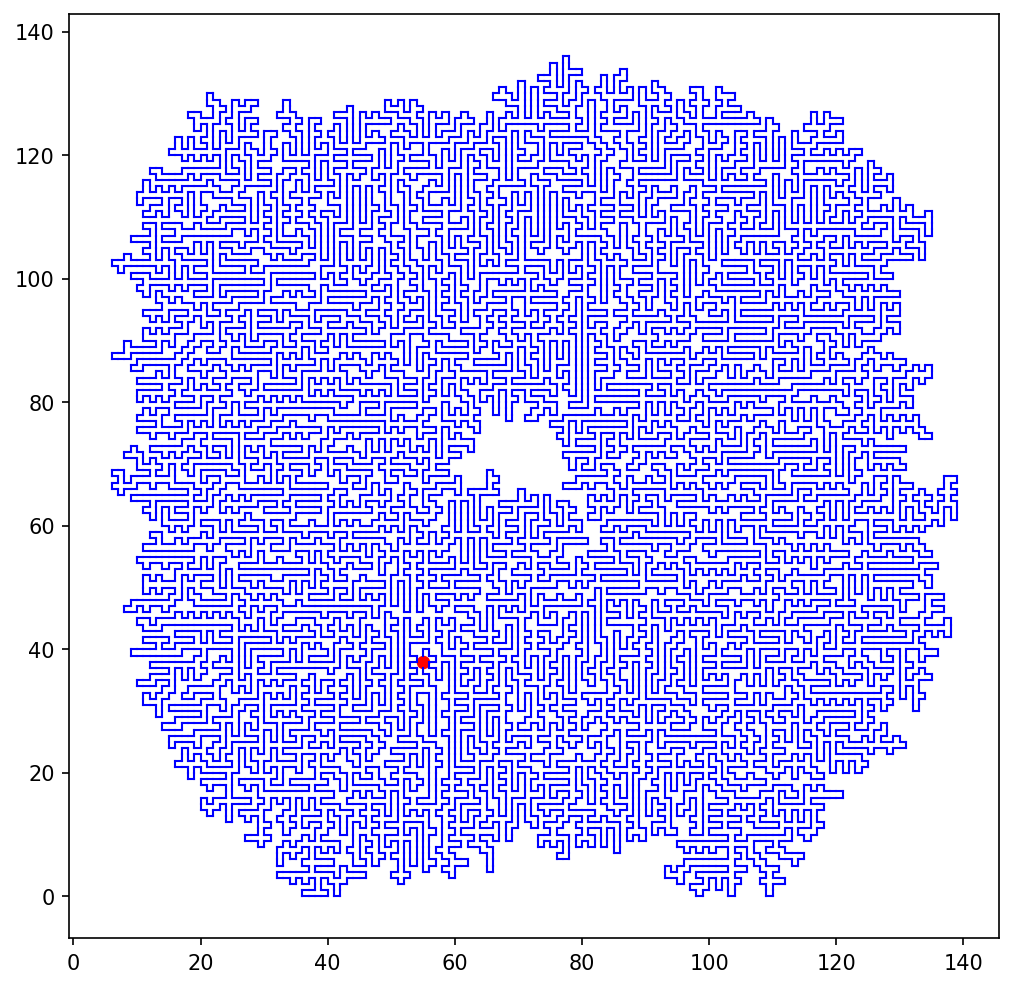

In [51]:
plt.figure(figsize=(8, 8), dpi=150)
for i in range(1, len(maze.path)):
    y1, x1 = maze.path[i - 1]
    y2, x2 = maze.path[i]
    plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
plt.scatter(maze.start_pos[1], maze.start_pos[0], color='red', marker='o', s=30)

--- Part Two ---

You quickly reach the farthest point of the loop, but the animal never emerges. Maybe its nest is within the area enclosed by the loop?

To determine whether it's even worth taking the time to search for such a nest, you should calculate how many tiles are contained within the loop. For example:

...........
.S-------7.
.|F-----7|.
.||.....||.
.||.....||.
.|L-7.F-J|.
.|..|.|..|.
.L--J.L--J.
...........

The above loop encloses merely four tiles - the two pairs of . in the southwest and southeast (marked I below). The middle . tiles (marked O below) are not in the loop. Here is the same loop again with those regions marked:

...........
.S-------7.
.|F-----7|.
.||OOOOO||.
.||OOOOO||.
.|L-7OF-J|.
.|II|O|II|.
.L--JOL--J.
.....O.....

In fact, there doesn't even need to be a full tile path to the outside for tiles to count as outside the loop - squeezing between pipes is also allowed! Here, I is still within the loop and O is still outside the loop:

..........
.S------7.
.|F----7|.
.||OOOO||.
.||OOOO||.
.|L-7F-J|.
.|II||II|.
.L--JL--J.
..........

In both of the above examples, 4 tiles are enclosed by the loop.

Here's a larger example:

.F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ...

The above sketch has many random bits of ground, some of which are in the loop (I) and some of which are outside it (O):

OF----7F7F7F7F-7OOOO
O|F--7||||||||FJOOOO
O||OFJ||||||||L7OOOO
FJL7L7LJLJ||LJIL-7OO
L--JOL7IIILJS7F-7L7O
OOOOF-JIIF7FJ|L7L7L7
OOOOL7IF7||L7|IL7L7|
OOOOO|FJLJ|FJ|F7|OLJ
OOOOFJL-7O||O||||OOO
OOOOL---JOLJOLJLJOOO

In this larger example, 8 tiles are enclosed by the loop.

Any tile that isn't part of the main loop can count as being enclosed by the loop. Here's another example with many bits of junk pipe lying around that aren't connected to the main loop at all:

FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJ7F7FJ-
L---JF-JLJ.||-FJLJJ7
|F|F-JF---7F7-L7L|7|
|FFJF7L7F-JF7|JL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L

Here are just the tiles that are enclosed by the loop marked with I:

FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJIF7FJ-
L---JF-JLJIIIIFJLJJ7
|F|F-JF---7IIIL7L|7|
|FFJF7L7F-JF7IIL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L

In this last example, 10 tiles are enclosed by the loop.

Figure out whether you have time to search for the nest by calculating the area within the loop. How many tiles are enclosed by the loop?


In [64]:
# Had to look this up: https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm
start_pipe = "|"

grid = [list(line) for line in puzzle.input_data.replace("S", start_pipe).split("\n")]

path = maze.path.copy()
path.append(maze.start_pos)
path = set(path)

border_pipes = set(["|", "L", "J"])
enclosed = 0
for r in range(len(grid)):
    borders = 0
    for c in range(len(grid[0])):
        pos = (r, c)
        if pos in path:
            if grid[r][c] in border_pipes:
                borders += 1
        elif borders % 2 == 1:
            enclosed += 1

puzzle.answer_b = enclosed       

That's the right answer!  You are one gold star closer to restoring snow operations.You have completed Day 10! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


gio: https://adventofcode.com/2023/day/10#part2: Operation not supported
